[*********************100%***********************]  1 of 1 completed


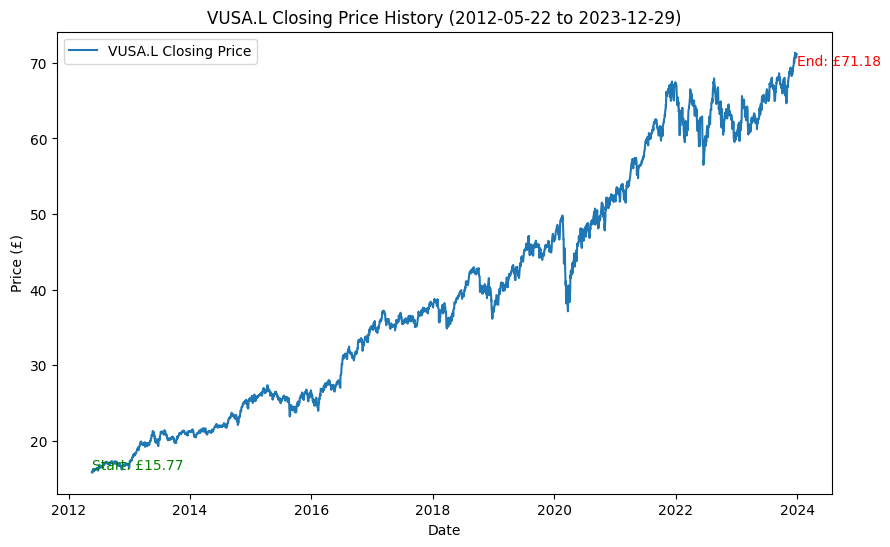

: 

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download data from Yahoo Finance
etf = "VUSA.L"  # Replace with the relevant ticker for your ETF
data = yf.download(etf, start="1990-01-01", end="2024-01-01")

# Plot the closing price history
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label=f'{etf} Closing Price')

# Annotate the starting and ending prices
start_price = data['Close'].iloc[0]
end_price = data['Close'].iloc[-1]
start_date = data.index[0].strftime('%Y-%m-%d')
end_date = data.index[-1].strftime('%Y-%m-%d')

# Add text annotations on the plot for start and end prices
plt.text(data.index[0], start_price, f'Start: £{start_price:.2f}', verticalalignment='bottom', color='green', fontsize=10)
plt.text(data.index[-1], end_price, f'End: £{end_price:.2f}', verticalalignment='top', color='red', fontsize=10)

# Add title and labels
plt.title(f'{etf} Closing Price History ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Price (£)')
plt.legend()

plt.show()


In [3]:
# Function to calculate lump-sum growth
def lump_sum_investment(data, initial_investment, years):
    # Calculate annual returns from daily close prices
    data['Return'] = data['Close'].pct_change()
    avg_annual_return = data['Return'].mean() * 252  # 252 trading days in a year
    
    # Compounded growth over the years
    future_value = initial_investment * (1 + avg_annual_return) ** years
    return future_value, avg_annual_return

# Lump-sum investment simulation
initial_investment = 10000  # Example amount
years = [10, 20, 30]

for year in years:
    future_value, avg_return = lump_sum_investment(data, initial_investment, year)
    print(f"After {year} years, the investment would be worth £{future_value:.2f}, with an average annual return of {avg_return:.2%}")


After 10 years, the investment would be worth £37614.43, with an average annual return of 14.17%
After 20 years, the investment would be worth £141484.53, with an average annual return of 14.17%
After 30 years, the investment would be worth £532186.00, with an average annual return of 14.17%


In [4]:
# Function to calculate growth with monthly contributions
def monthly_contributions(data, monthly_contribution, years):
    # Monthly returns
    data['Monthly Return'] = data['Close'].pct_change().resample('M').ffill().mean()
    data = data.dropna()

    future_value = 0
    months = years * 12

    for month in range(months):
        future_value = (future_value + monthly_contribution) * (1 + data['Monthly Return'].mean())

    return future_value

# Monthly contributions simulation
monthly_contribution = 100  # Example amount
for year in years:
    future_value = monthly_contributions(data, monthly_contribution, year)
    print(f"After {year} years of £{monthly_contribution}/month contributions, the investment would be worth £{future_value:.2f}")


After 10 years of £100/month contributions, the investment would be worth £11692.32
After 20 years of £100/month contributions, the investment would be worth £22795.06
After 30 years of £100/month contributions, the investment would be worth £33337.96


C:\Users\pthuk\AppData\Local\Temp\ipykernel_17580\2917145678.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Monthly Return'] = data['Close'].pct_change().resample('M').ffill().mean()
C:\Users\pthuk\AppData\Local\Temp\ipykernel_17580\2917145678.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Monthly Return'] = data['Close'].pct_change().resample('M').ffill().mean()
